<a href="https://colab.research.google.com/github/vicentemf/Mercado-Financeiro/blob/main/an%C3%A1lise_portfolio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1- Libraries

In [324]:
!pip install investpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [325]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (12,6)
import investpy

2-CHOOSING STOCK PORTFOLIO AND TIME SERIES

In [326]:
stocks=['PSSA3','ITUB4','CMIG4','PETR4']
weight= np.array([0.20,0.30,0.30,0.20])

In [327]:
portfolio=pd.DataFrame()

In [328]:
for i in stocks:
 df=investpy.get_stock_historical_data(stock=i,country='Brazil',from_date='01/01/2021',to_date='01/01/2022').Close
 df.rename(i,inplace=True)
 portfolio= pd.concat([portfolio,df],axis=1)
 portfolio.index.name='Date'
portfolio

,PSSA3,ITUB4,CMIG4,PETR4
Date,,,,
2021-01-04,22.75,25.22,8.49,28.91
2021-01-05,22.55,25.06,8.49,30.04
2021-01-06,22.09,25.75,8.69,30.07
2021-01-07,22.62,26.80,8.57,31.00
2021-01-08,24.19,26.79,9.16,31.12
...,...,...,...,...
2021-12-23,20.90,21.34,9.56,28.33
2021-12-27,21.00,21.56,9.62,28.75
2021-12-28,20.88,21.48,9.65,28.78


In [329]:
import seaborn as sns

3.CORRELATION OF PORTFOLIO RETURNS


In [330]:
daily_returns= portfolio.pct_change()

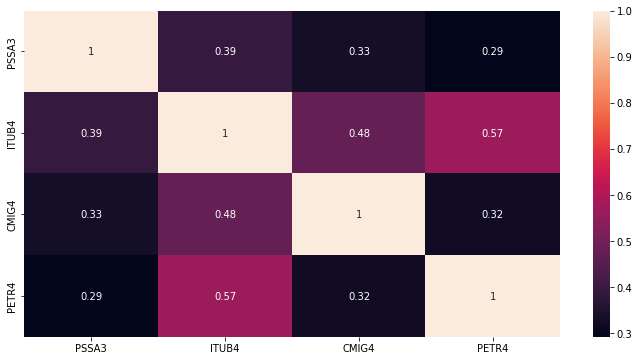

In [331]:
correlation_returns=daily_returns.corr()
sns.heatmap(correlation_returns,annot=True);

4-CALCULATION OF ACCUMULATED RETURN

In [332]:
accumulated_return=(1+daily_returns).cumprod()

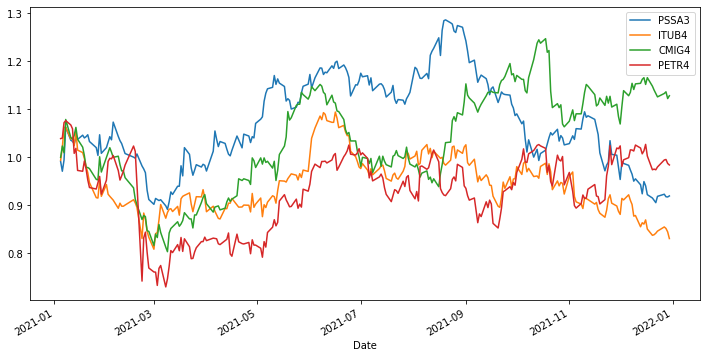

In [333]:
accumulated_return.plot()

In [334]:
portfolio_return=pd.DataFrame((daily_returns * weight).sum(axis=1))
portfolio_return.rename(columns={0:'Returns'},inplace=True)

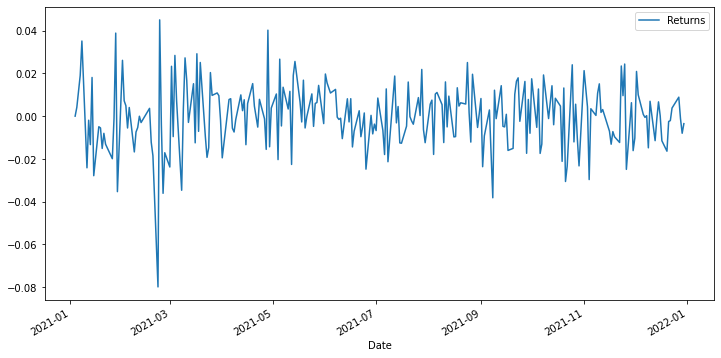

In [335]:
portfolio_return.plot()

In [336]:
return_accumulated=(1+portfolio_return).cumprod()

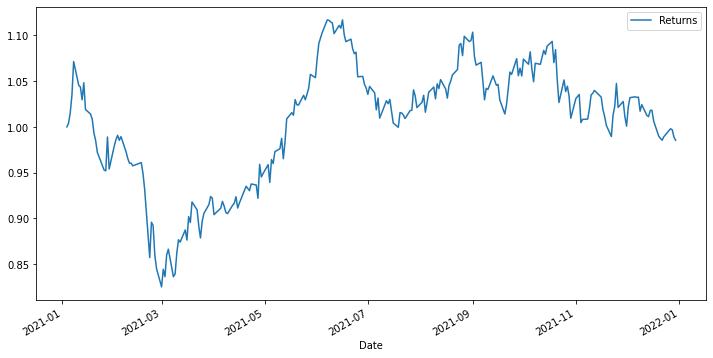

In [337]:
return_accumulated.plot()

5-PORTFOLIO VOLATILITY

In [338]:
cov_matrix= daily_returns.cov()

In [339]:
cov_matrix

,PSSA3,ITUB4,CMIG4,PETR4
PSSA3,0.000312,0.000132,0.000109,0.000145
ITUB4,0.000132,0.000361,0.000168,0.000304
CMIG4,0.000109,0.000168,0.000347,0.000169
PETR4,0.000145,0.000304,0.000169,0.000793


In [340]:
daily_volatility= np.sqrt(np.dot(weight.T,np.dot(cov_matrix,weight)))

In [341]:
print(f'Daily_volatility is: {round(daily_volatility*100,2)}%') 

Daily_volatility is: 1.53%


In [342]:
anual_volatility=daily_volatility*np.sqrt(252)

In [343]:
print(f'Anual volatility is: {round(anual_volatility*100,2)}%') 

Anual volatility is: 24.36%


6-COMPARING WITH IBOV

In [344]:
ibov=investpy.get_index_historical_data(index='Bovespa',country='Brazil',from_date='01/01/2021',to_date='01/01/2022').Close

In [345]:
ibov_returns=ibov.pct_change()

In [346]:
ibov_acm=pd.DataFrame((1+ibov_returns).cumprod())

In [347]:
ibov_acm.rename(columns={'Close':'IBOV'},inplace=True)
ibov_acm.dropna(inplace=True)

In [348]:
benchmark=pd.merge(return_accumulated,ibov_acm,how='inner',right_index=True,left_index=True)

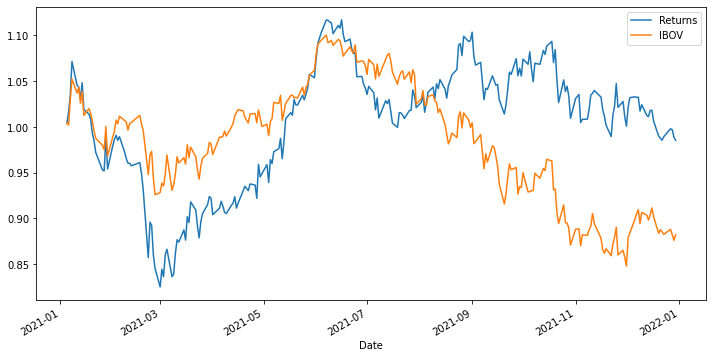

In [349]:
benchmark.plot()

7-PORTFOLIO BETA

In [350]:
import statsmodels.api as sm

In [351]:
Y=benchmark['Returns']
X=benchmark['IBOV']
X=sm.add_constant(X)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [352]:
model=sm.OLS(Y,X)
result=model.fit()

In [353]:
result

In [354]:
portfolio_beta=result.params[1]


In [355]:
print(f'The portfolio Beta is: {round(portfolio_beta,2)}')

The portfolio Beta is: 0.23


8-Sharpe Ratio

In [356]:
selic=0.1325

In [357]:
sharpe_ratio=(portfolio_return.mean()*252-selic)/(anual_volatility)

In [358]:
sharpe_ratio

Returns   -0.484099
dtype: float64

In [359]:
print(f'The Sharpe index is : {round(sharpe_ratio,2)}')

The Sharpe index is : Returns   -0.48
dtype: float64


9-DROWNDAWN MAX

In [360]:
maximum= return_accumulated.expanding(min_periods=1).max()
drowndaw=(return_accumulated/maximum)-1
drowndaw=drowndaw.min()

In [364]:
print(f'The maximum drowndaw is: {round(drowndaw*100,2)}%')

The maximum drowndaw is: Returns   -23.0
dtype: float64%
